In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Probability of flow

In [3]:
res_path = 'percolation_res/p_flow/'
filename = lambda lattice, L, mcs : res_path + 'p_flow_' + lattice + '_L' + str(L) + '_mcs' + str(mcs) + '.dat'

### Square

Text(0.5, 1.0, 'Probability of flow on square lattice for different lattice sizes')

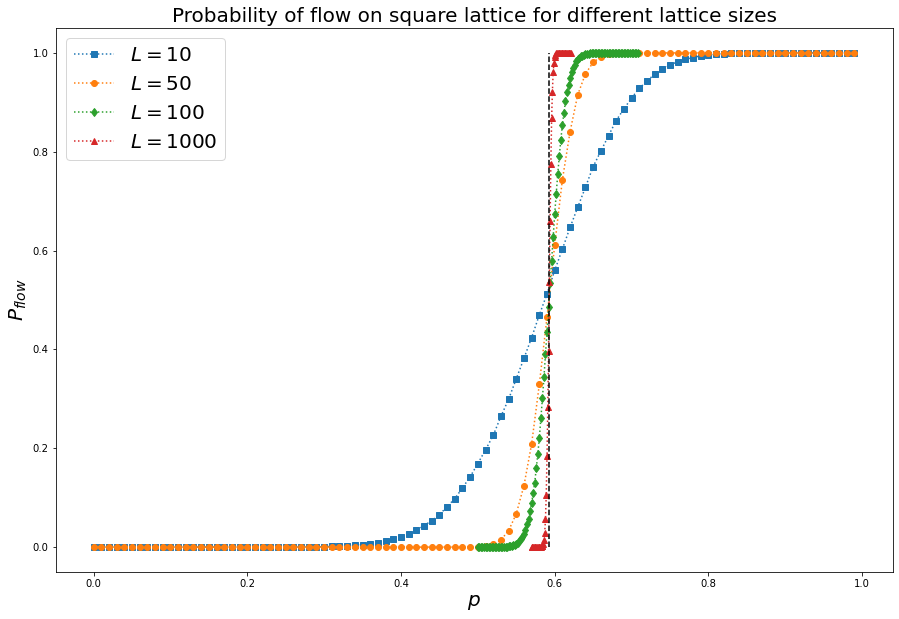

In [6]:
LL = ["10","50","100","1000"]

markers = ["s","o","d","^"]
fig = plt.figure(figsize=(15,10))

for L in LL:
    mcs = 0
    if L == "1000":
        mcs = 10000
    else:
        mcs = 100000
    data = np.loadtxt(filename('square', L, mcs))
    p = data[:,0]
    p_flow = data[:,1]
    plt.plot(p, p_flow, label='$L = $' + L, linestyle=':', marker=markers.pop(0))
plt.vlines(0.59274621, ymin=0,ymax=1, color='k', linestyle='--')

plt.legend(fontsize=20)
plt.xlabel('$p$', fontsize=20)
plt.ylabel("$P_{flow}$", fontsize=20)
plt.title("Probability of flow on square lattice for different lattice sizes", fontsize=20)

### Triangular

Text(0.5, 1.0, 'Probability of flow on triangular lattice for different lattice sizes')

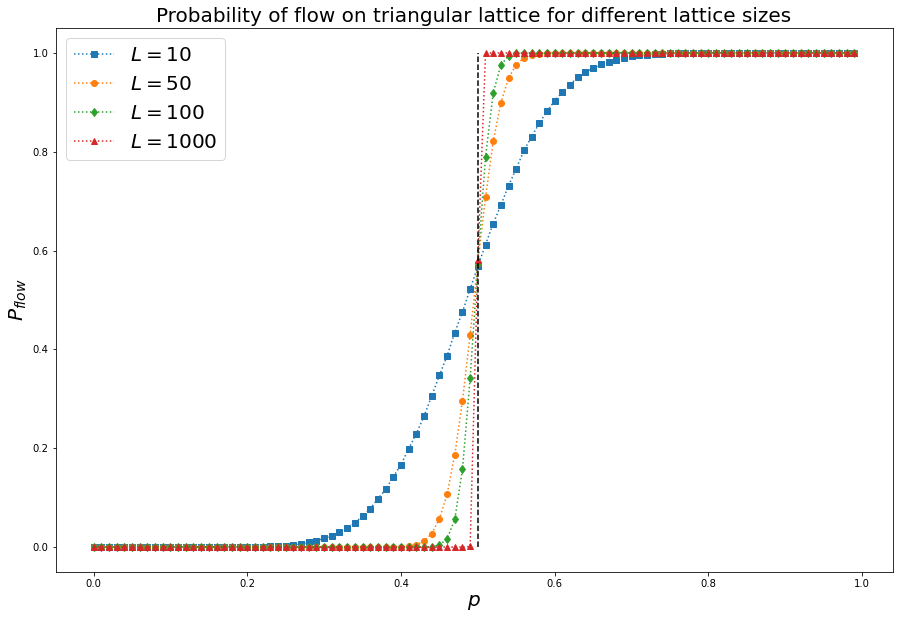

In [5]:
LL = ["10","50","100","1000"]
markers = ["s","o","d","^"]
fig = plt.figure(figsize=(15,10))

for L in LL:
    mcs = 0
    if L == "1000":
        mcs = 10000
    else:
        mcs = 100000
    data = np.loadtxt(filename('triangle', L, mcs))
    p = data[:,0]
    p_flow = data[:,1]
    plt.plot(p, p_flow, label='$L = $' + L, linestyle=':', marker=markers.pop(0))
plt.vlines(0.5, ymin=0,ymax=1, color='k', linestyle='--')
plt.legend(fontsize=20)
plt.xlabel('$p$', fontsize=20)
plt.ylabel("$P_{flow}$", fontsize=20)
plt.title("Probability of flow on triangular lattice for different lattice sizes", fontsize=20)

# Maximal cluster size

In [7]:
res_path = 'percolation_res/max_cluster/'
filename = lambda lattice, L, mcs : res_path + 'max_cluster_size_' + lattice + '_L' + str(L) + '_mcs' + str(mcs) + '.dat'

### Square

Text(0.5, 1.0, 'Max cluster size on square lattice for different lattice sizes')

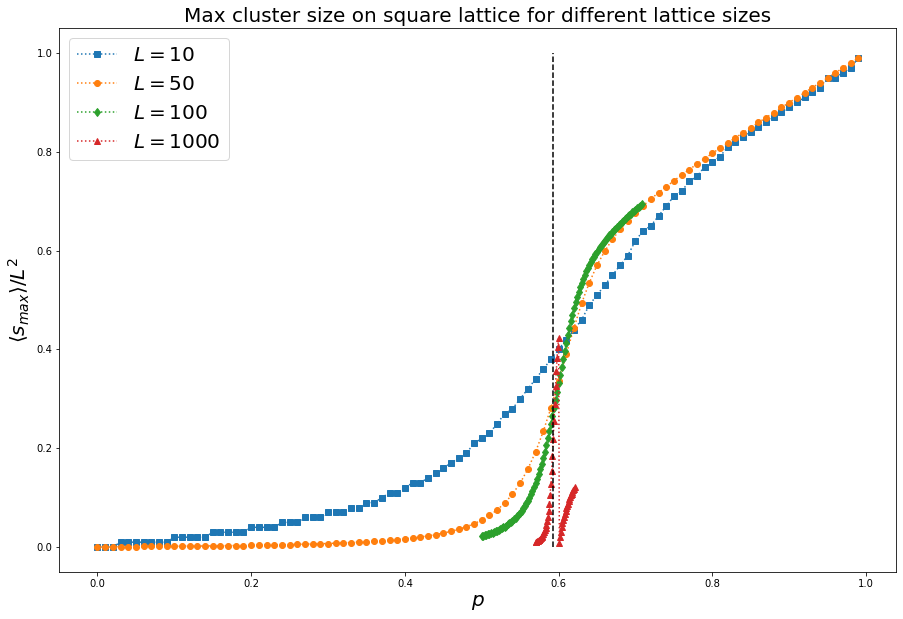

In [8]:
LL = ["10","50","100", "1000"]

markers = ["s","o","d","^"]
fig = plt.figure(figsize=(15,10))

for L in LL:
    mcs = 0
    if L == "1000":
        mcs = 10000
    else:
        mcs = 100000
    data = np.loadtxt(filename('square', L, mcs))
    p = data[:,0]
    max_cluster = data[:,1]/int(L)**2
    plt.plot(p, max_cluster, label='$L = $' + L, linestyle=':', marker=markers.pop(0))
plt.vlines(0.59274621, ymin=0,ymax=1, color='k', linestyle='--')

plt.legend(fontsize=20)
plt.xlabel('$p$', fontsize=20)
plt.ylabel(r"$\langle s_{max} \rangle/L^2$", fontsize=20)
plt.title("Max cluster size on square lattice for different lattice sizes", fontsize=20)

### Triangle

Text(0.5, 1.0, 'Max cluster size on triangular lattice for different lattice sizes')

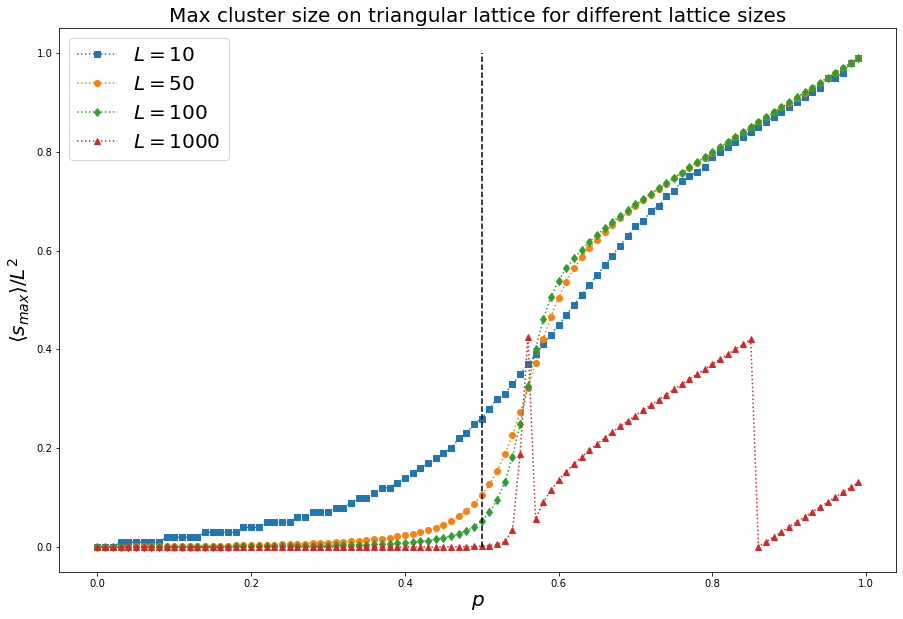

In [9]:
LL = ["10","50","100","1000"]

markers = ["s","o","d","^"]
fig = plt.figure(figsize=(15,10))

for L in LL:
    mcs = 0
    if L == "1000":
        mcs = 10000
    else:
        mcs = 100000
    data = np.loadtxt(filename('triangle', L, mcs))
    p = data[:,0]
    max_cluster = data[:,1]/int(L)**2
    plt.plot(p, max_cluster, label='$L = $' + L, linestyle=':', marker=markers.pop(0))
plt.vlines(0.5, ymin=0,ymax=1, color='k', linestyle='--')
plt.legend(fontsize=20)
plt.xlabel('$p$', fontsize=20)
plt.ylabel(r"$\langle s_{max} \rangle/L^2$", fontsize=20)
plt.title("Max cluster size on triangular lattice for different lattice sizes", fontsize=20)

# Cluster size distribution

In [54]:
res_path = 'percolation_res/cluster_dist/'
filename = lambda lattice, L, mcs, p : res_path + 'cluster_sizes_distribution_' + lattice + '_L' + str(L) + '_mcs' + str(mcs) +'_p' + r'{0:.6f}'.format(p)+ '.dat'

### Square